In [12]:
from gensim.corpora import WikiCorpus

input_file = "zhwiki-20241120-pages-articles-multistream4.xml-p1389649p2889648.bz2"  # 维基百科数据文件
output_file = "wiki_texts.txt"  # 输出文件

# 初始化WikiCorpus，移除lemmatize参数
wiki = WikiCorpus(input_file, dictionary={})

# 将提取的文本写入文件
with open(output_file, "w", encoding="utf-8") as f:
    for text in wiki.get_texts():
        f.write(" ".join(text) + "\n")

In [13]:
import jieba
from collections import Counter
import math

# 加载预处理后的中文维基百科文本
with open("wiki_texts.txt", "r", encoding="utf-8") as f:
    text = f.read()

# 计算字级信息熵
chars = list(text)  # 将文本拆分为单字
char_freq = Counter(chars)  # 统计字频
total_chars = len(chars)  # 总字数
char_entropy = 0.0

for char, count in char_freq.items():
    prob = count / total_chars  # 计算概率
    char_entropy -= prob * math.log2(prob)  # 累加熵值

print(f"字级信息熵: {char_entropy:.4f}")

# 计算词级信息熵
words = list(jieba.cut(text))  # 分词
word_freq = Counter(words)  # 统计词频
total_words = len(words)  # 总词数
word_entropy = 0.0

for word, count in word_freq.items():
    prob = count / total_words  # 计算概率
    word_entropy -= prob * math.log2(prob)  # 累加熵值

print(f"词级信息熵: {word_entropy:.4f}")

字级信息熵: 9.0328
词级信息熵: 11.4932


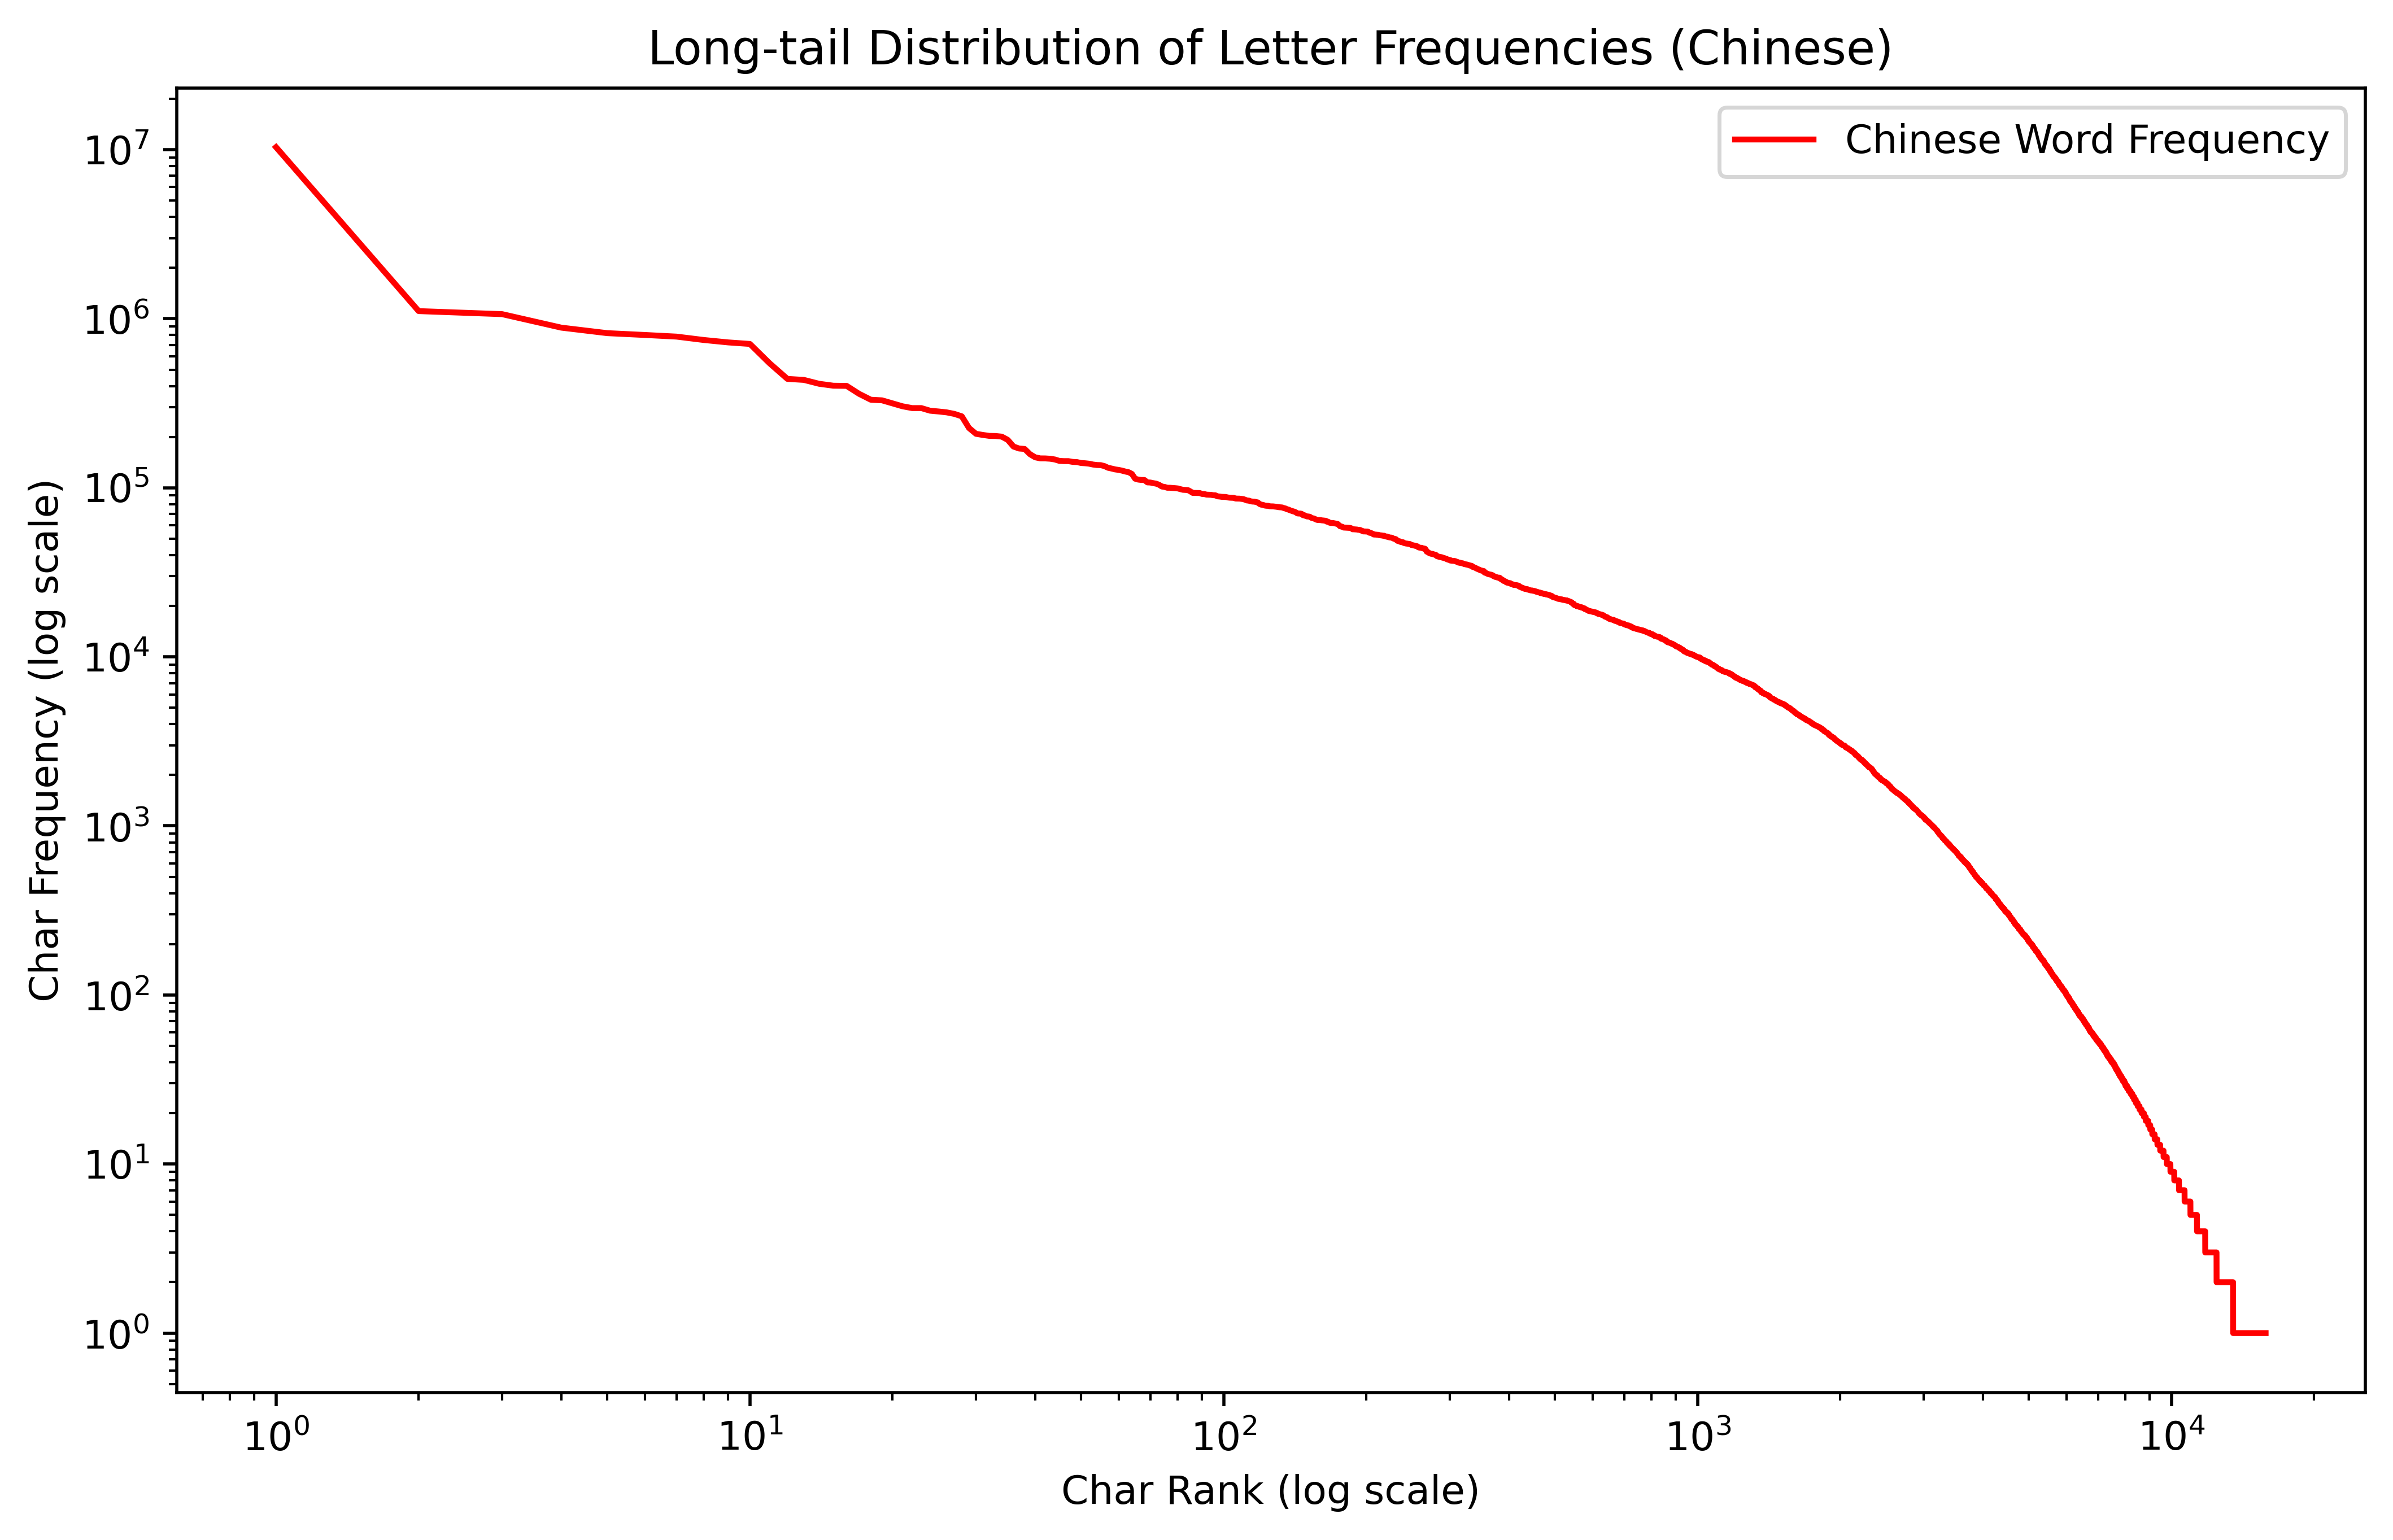

In [14]:
import matplotlib.pyplot as plt

char_freq = sorted(char_freq.values(), reverse=True)  # 按频率排序

plt.figure(figsize=(10, 6), dpi=500)
# 绘制中文词频长尾图
plt.plot(range(1, len(char_freq) + 1), char_freq, label="Chinese Word Frequency", color="red")

# 设置对数坐标轴
plt.xscale("log")
plt.yscale("log")

# 添加标题和标签
plt.title("Long-tail Distribution of Letter Frequencies (Chinese)")
plt.xlabel("Char Rank (log scale)")
plt.ylabel("Char Frequency (log scale)")
plt.legend()

# 显示图形
plt.show()

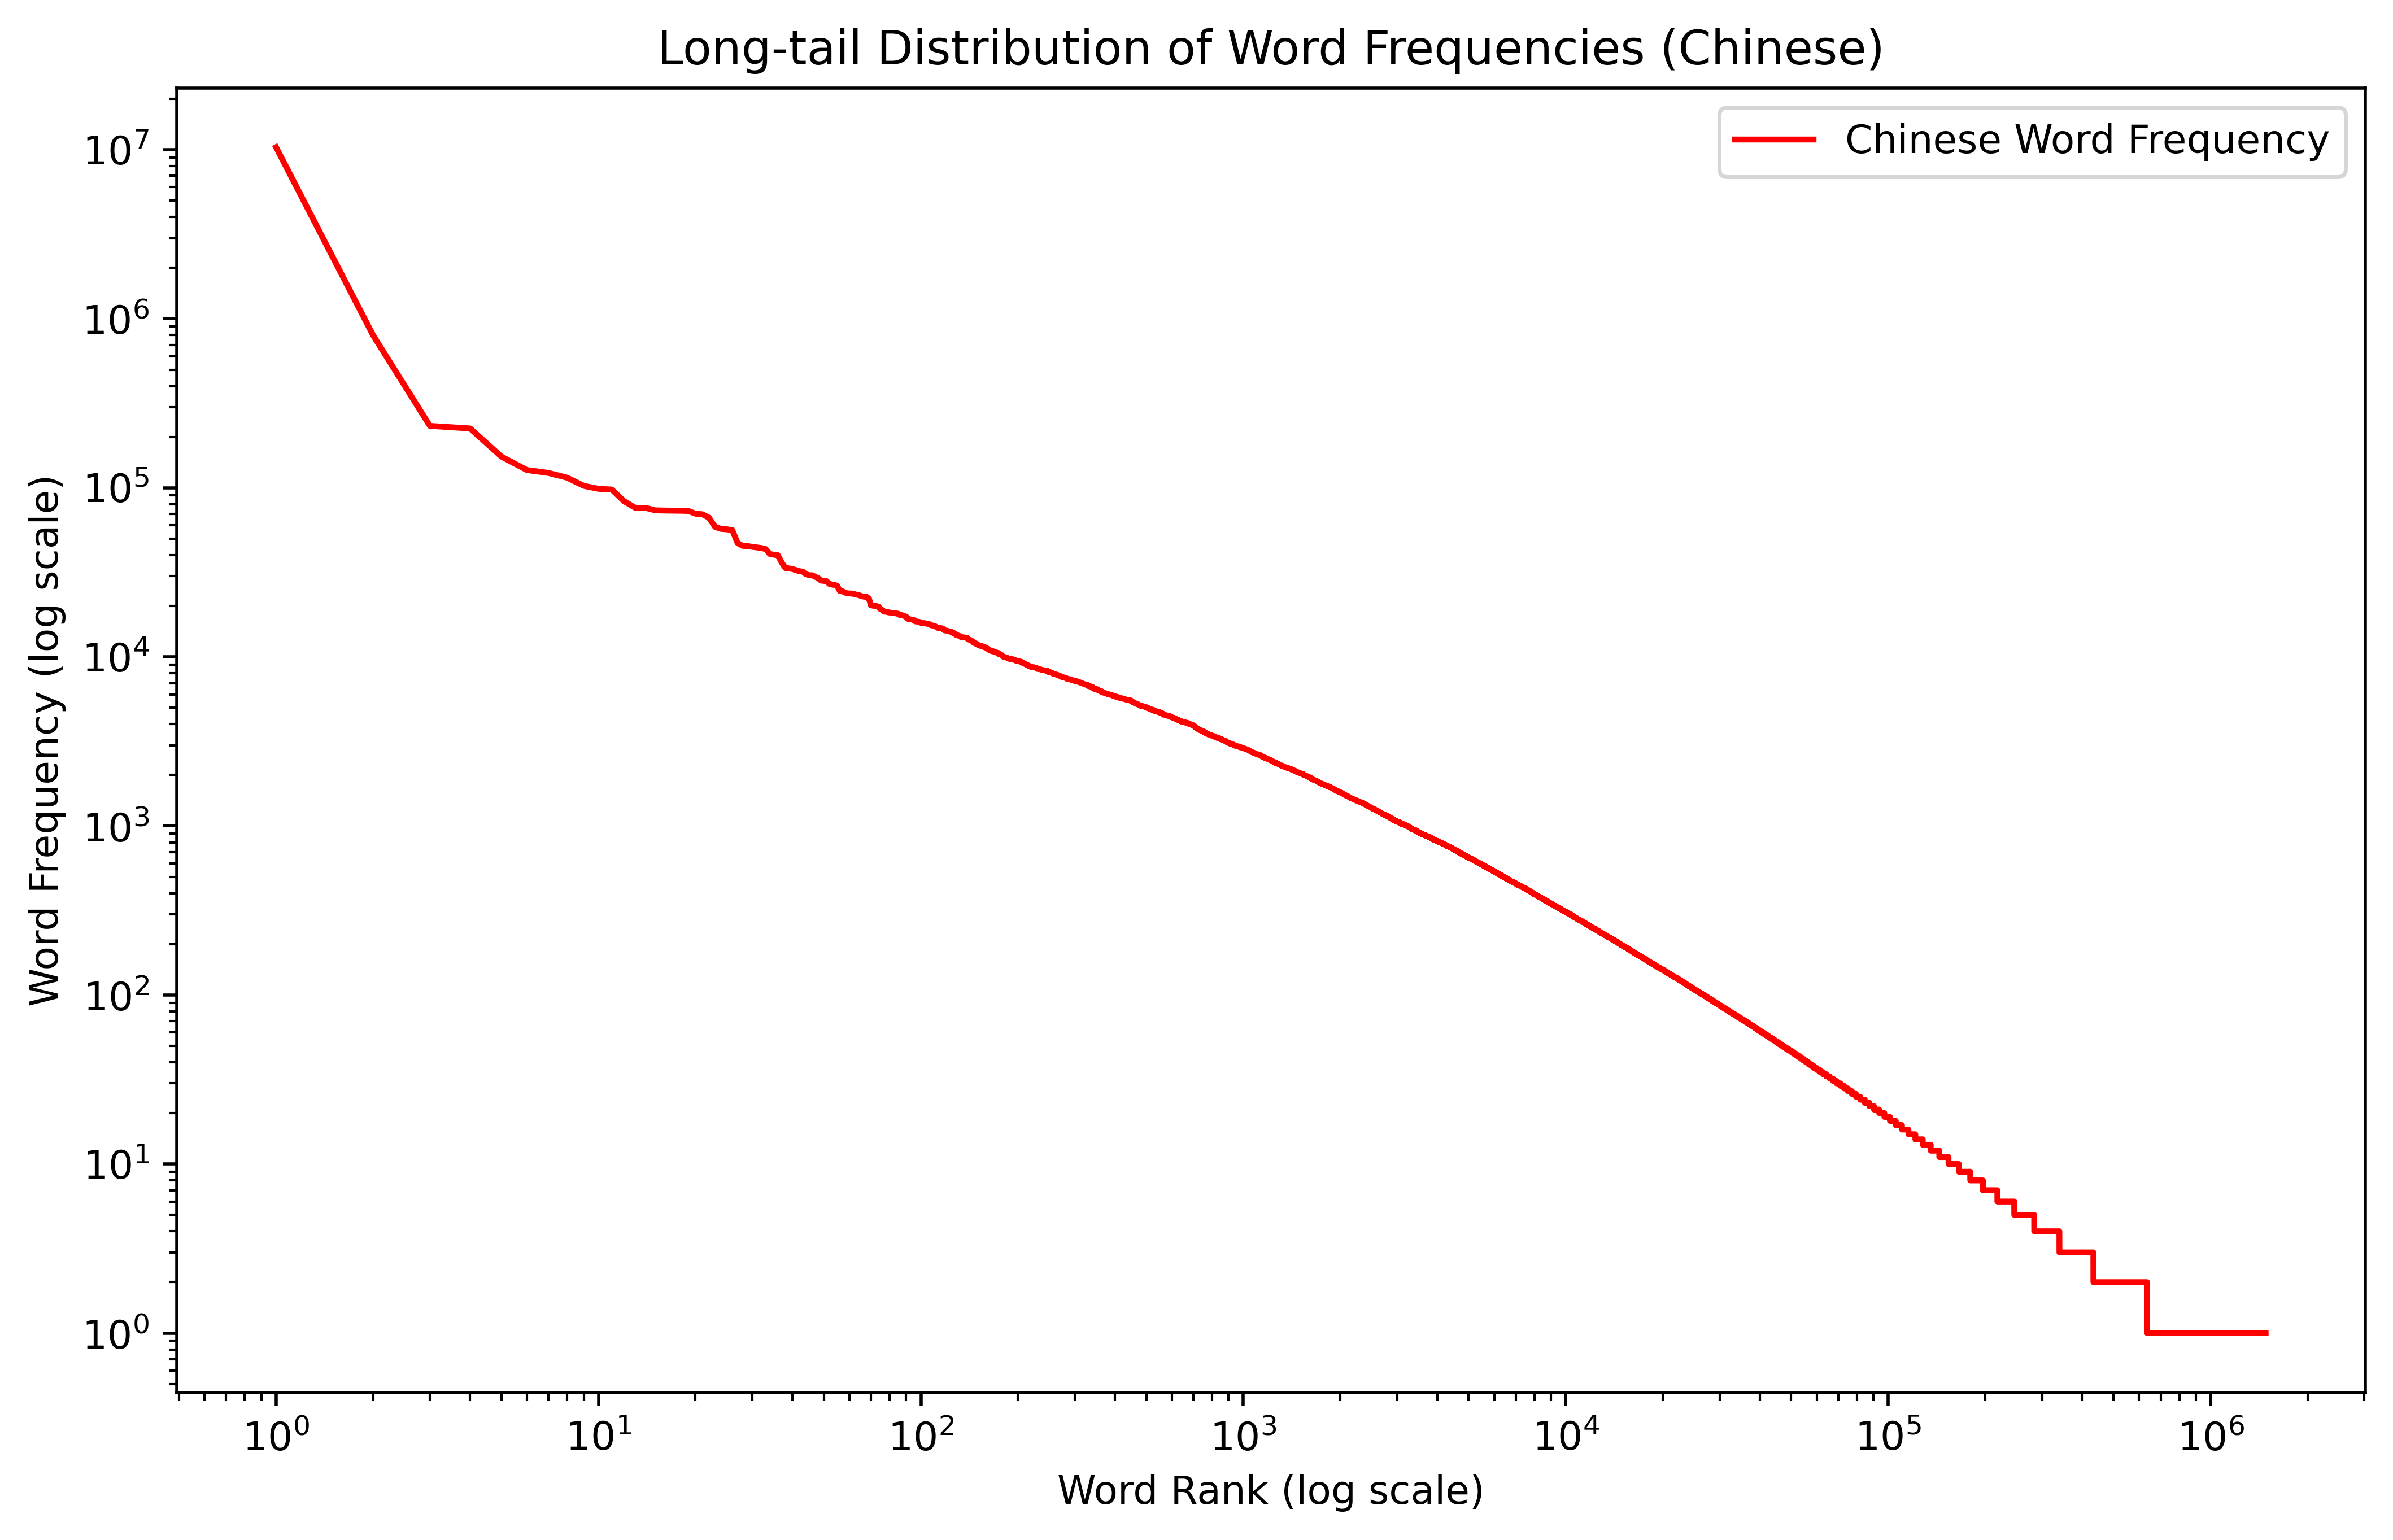

In [16]:
import matplotlib.pyplot as plt

word_freq = sorted(word_freq.values(), reverse=True)  # 按频率排序

plt.figure(figsize=(10, 6), dpi=500)
# 绘制中文词频长尾图
plt.plot(range(1, len(word_freq) + 1), word_freq, label="Chinese Word Frequency", color="red")

# 设置对数坐标轴
plt.xscale("log")
plt.yscale("log")

# 添加标题和标签
plt.title("Long-tail Distribution of Word Frequencies (Chinese)")
plt.xlabel("Word Rank (log scale)")
plt.ylabel("Word Frequency (log scale)")
plt.legend()

# 显示图形
plt.show()